<a href="https://colab.research.google.com/github/diegoax/ALNAE-2025/blob/main/notebooks/clase16_ALNAE_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clase 16 (Miércoles 28 de mayo, 2025)
---

# Aproximando valores propios

En esta clase hablaremos un poco de cómo calcular valores propios de una matriz, para luego pasar a ejercicios prácticos sobre los temas vistos.

## Método QR

El **método QR** es una técnica numérica iterativa para encontrar los valores propios de una matriz $A \in \mathbb{R}^{n \times n}$.

## Algoritmo básico (sin desplazamientos)

Dado $A_0 := A$, repetimos:

1. Descomponer $A_k = Q_k R_k$, donde $Q_k$ es ortogonal y $R_k$ es triangular superior
2. Definir $A_{k+1} := R_k Q_k$

Cada $A_k$ es similar a $A$: tienen los mismos valores propios. Bajo ciertas condiciones, $A_k$ converge a una matriz triangular superior, y los autovalores se aproximan en su diagonal.

---

## Ejemplo en Julia

En este ejemplo tomamos una matriz $3 \times 3$ y aplicamos 30 iteraciones del método QR. Mostramos el módulo de los elementos por debajo de la diagonal, que deberían tender a cero.


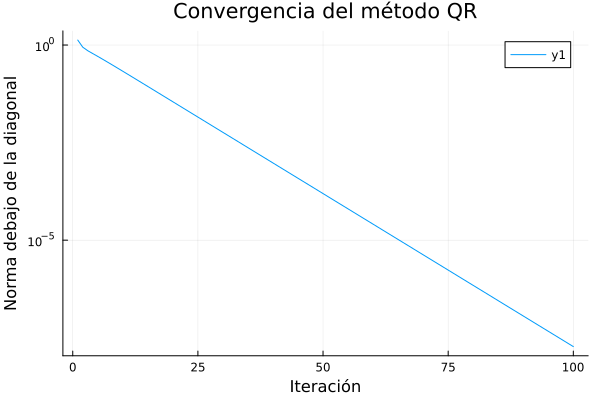

In [11]:
using LinearAlgebra          # Importa funciones como qr, norm, tril
using Plots                  # Para graficar la convergencia

# Definimos una matriz simétrica tridiagonal (ejemplo clásico)
B = randn(3,3)
A=B+B'           # Matriz A inicial simétrica
n = size(A, 1)               # Tamaño de la matriz (n = 3)
Ak = copy(A)                 # Copiamos A para trabajar iterativamente

below_diag_norms = Float64[] # Lista para guardar las normas de lo que hay debajo de la diagonal

# Aplicamos 30 iteraciones del método QR
for k in 1:100
    Q, R = qr(Ak)            # Descomposición QR de la matriz Ak
    Ak = R * Q               # Nueva matriz similar: A_{k+1} = R * Q
    push!(below_diag_norms, norm(tril(Ak, -1)))  # Guardamos la norma de los elementos debajo de la diagonal
end

# Graficamos la convergencia (en escala logarítmica)
plot(
    below_diag_norms,
    yscale = :log10,
    xlabel = "Iteración",
    ylabel = "Norma debajo de la diagonal",
    title = "Convergencia del método QR"
)


### Comentarios

1. **Por qué converge a una matríz triangular superior?**
Lo que está de fondo es que el algoritmo puede pensarse como un método de la potencia, pero sobre el espacio banderas (ver [Notas Optimización en Variedades, Sección 2.1.4
](https://drive.google.com/file/d/16xKuWQbPGyHI_37gfJSBfcBjQByQHDK7/view?usp=sharing)

2. El **algoritmo QR siempre converge?** Se pensaba que en condiciones normales el algoritmo QR siempre convergía. Batterson-Smillie prueban que esto no era así.

3. **Qué variantes tenemos?** QR con shift.

La idea básica de fondo es que el método de la potencia funciona rápido si el valor propio dominante es mucho más grande (en magnitud) que el resto de los valores propios. Por lo tanto, una idea inteligente es que si $s$ es casi un valor propio $\lambda_i$, entonces $(A-s\mathrm{Id})^{-1}$ tiene por vector propio dominante a $v_i$.

El Algoritmo QR con shift utiliza esta técnica del shift. Es un problema abierto saber si este algoritmo converge en un conjunto de probabilidad 1 de matrices.

